In [2]:
import numpy as np
import matplotlib.pyplot as plt
from run_evolution import folder_evol, folder_gs
from operators import measure_energy_per_site
import yastn
import yastn.tn.mps as mps


In [4]:
g = 1 / 5
L0 = 0
D0 = 64

engs, ents = {}, {}

for m in [0*g, 0.125 * g, 0.25 * g, 0.5 * g]:
    for N, a in [(100, 1.0), (200, 0.5), (400, 0.25)]:
        folder = folder_evol(g, m, L0, a, N, 1, 1)
        engs[m, N] = np.loadtxt(folder / "engs.txt", delimiter=";")
        ents[m, N] = np.loadtxt(folder / "ents.txt", delimiter=";")

Text(0.43, 1.0, 'excitation energy')

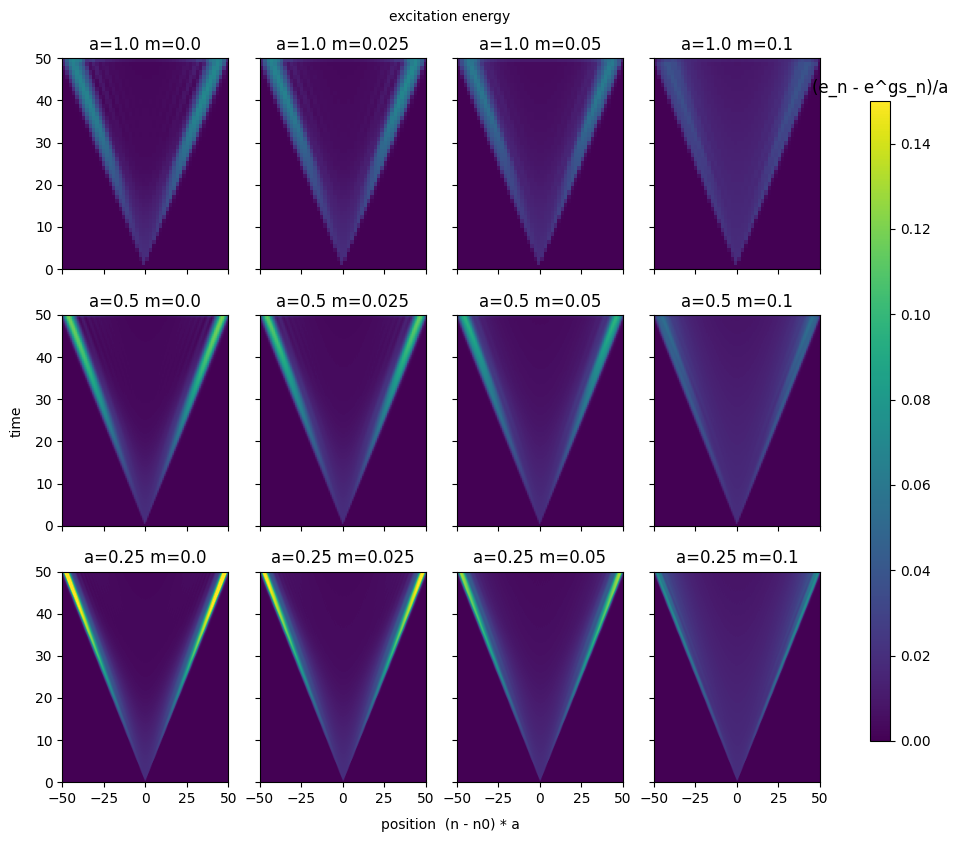

In [5]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 8))
for i, m in enumerate([0*g, 0.125 * g, 0.25 * g, 0.5 * g]):
    for j, (N, a) in enumerate([(100, 1.0), (200, 0.5), (400, 0.25)]):

        ee = engs[m, N][:, 1:]
        tm = engs[m, N][:, 0]
        ee = (ee[:, 0::2] + ee[:, 1::2]) /2
        ee = np.insert(ee, 0, 0, 0)
        ee = ee / a

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]), origin='lower', aspect='auto', vmin=0, vmax=0.15)
        ax[j, i].set_title(f"{a=} {m=}")
        ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 50])
        # ax[j, i].set_xlabel("position")
        # ax[j, i].set_ylabel("time")
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('(e_n - e^gs_n)/a')

fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'excitation energy', ha='center')

Text(0.43, 1.0, 'von Neuman entropy (above g.s. background)')

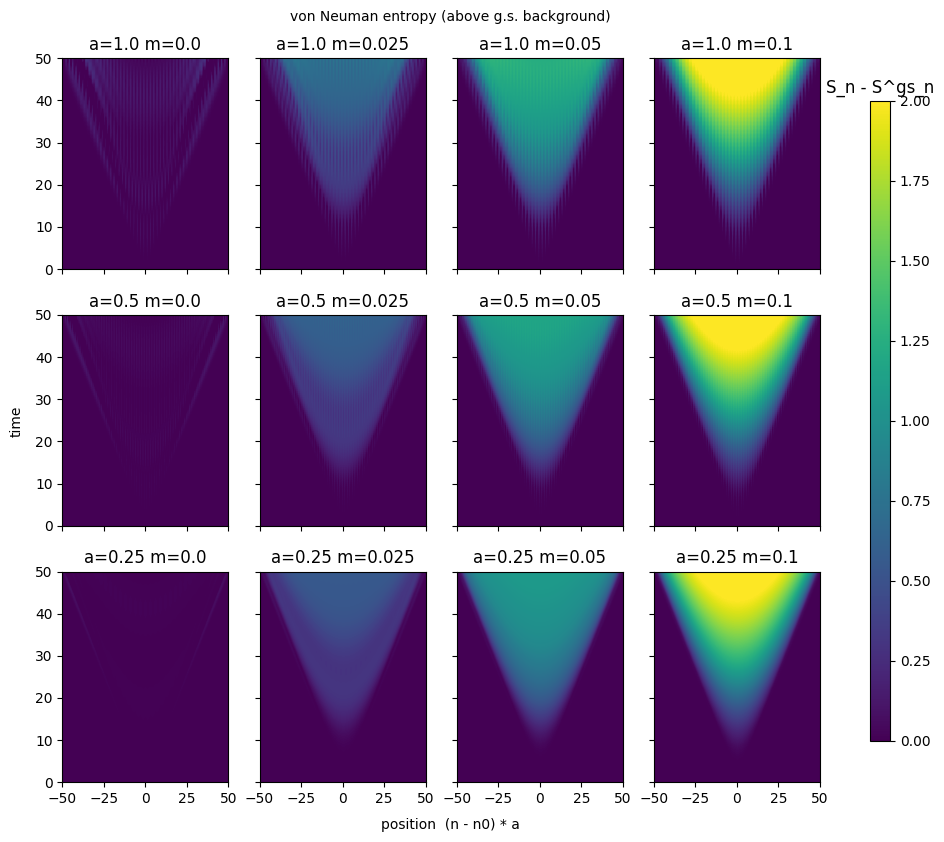

In [6]:
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 8))
for i, m in enumerate([0*g, 0.125 * g, 0.25 * g, 0.5 * g]):
    for j, (N, a) in enumerate([(100, 1.0), (200, 0.5), (400, 0.25)]):

        ee = ents[m, N][:, 1:]
        ee0 = ee[0, :]
        ee = ee - ee0
        tm = ents[m, N][:, 0]

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]), origin='lower', aspect='auto', vmin=0, vmax=2)
        ax[j, i].set_title(f"{a=} {m=}")
        ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 50])
        # ax[j, i].set_xlabel("position")
        # ax[j, i].set_ylabel("time")
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('S_n - S^gs_n')

fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'von Neuman entropy (above g.s. background)', ha='center')


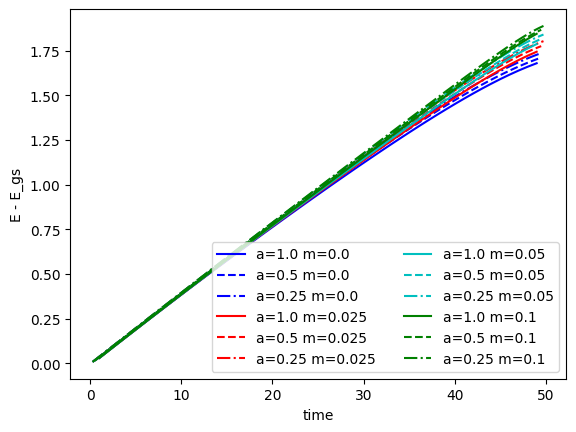

In [9]:
clrs = {0.0: 'b', 0.025: 'r', 0.05: 'c', 0.1:'g'}
smbs = {100: '-', 200: '--', 400: '-.'}

for i, m in enumerate([0*g, 0.125 * g, 0.25 * g, 0.5 * g]):
    for j, (N, a) in enumerate([(100, 1.0), (200, 0.5), (400, 0.25)]):
        ee = np.sum(engs[m, N][:-1, 1:], axis=1)
        tm = ents[m, N][:-1, 0]
        plt.plot(tm, ee, smbs[N], color=clrs[m], label=f"{a=} {m=}")
plt.xlabel('time')
plt.ylabel('E - E_gs')
plt.legend(ncols=2)



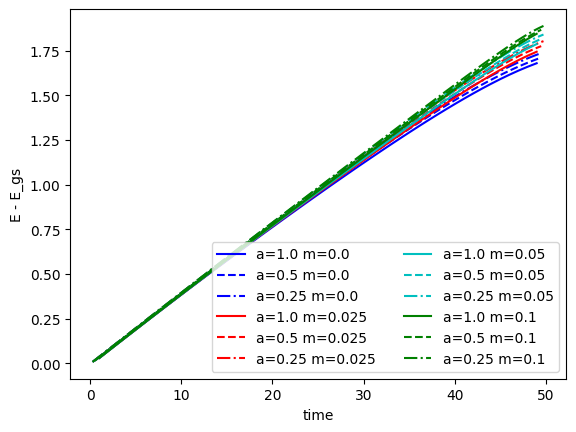

In [ ]:
clrs = {0.0: 'b', 0.025: 'r', 0.05: 'c', 0.1:'g'}
smbs = {100: '-', 200: '--', 400: '-.'}

for i, m in enumerate([0*g, 0.125 * g, 0.25 * g, 0.5 * g]):
    for j, (N, a) in enumerate([(100, 1.0), (200, 0.5), (400, 0.25)]):
        ee = np.sum(engs[m, N][:-1, 1:], axis=1)
        tm = ents[m, N][:-1, 0]
        plt.plot(tm, ee, smbs[N], color=clrs[m], label=f"{a=} {m=}")
plt.xlabel('time')
plt.ylabel('E - E_gs')
plt.legend(ncols=2)



In [3]:
g = 1 / 5
L0 = 0
D0 = 64

engs, ents = {}, {}

N = 640
for m in [0 * g, 0.25 * g, 0.5 * g]:
    for a in [1, 0.25]:
        folder = folder_evol(g, m, L0, a, N, 1, 1)
        engs[m, N] = np.loadtxt(folder / "engs.txt", delimiter=";")
        ents[m, N] = np.loadtxt(folder / "ents.txt", delimiter=";")

Text(0.43, 1.0, 'excitation energy')

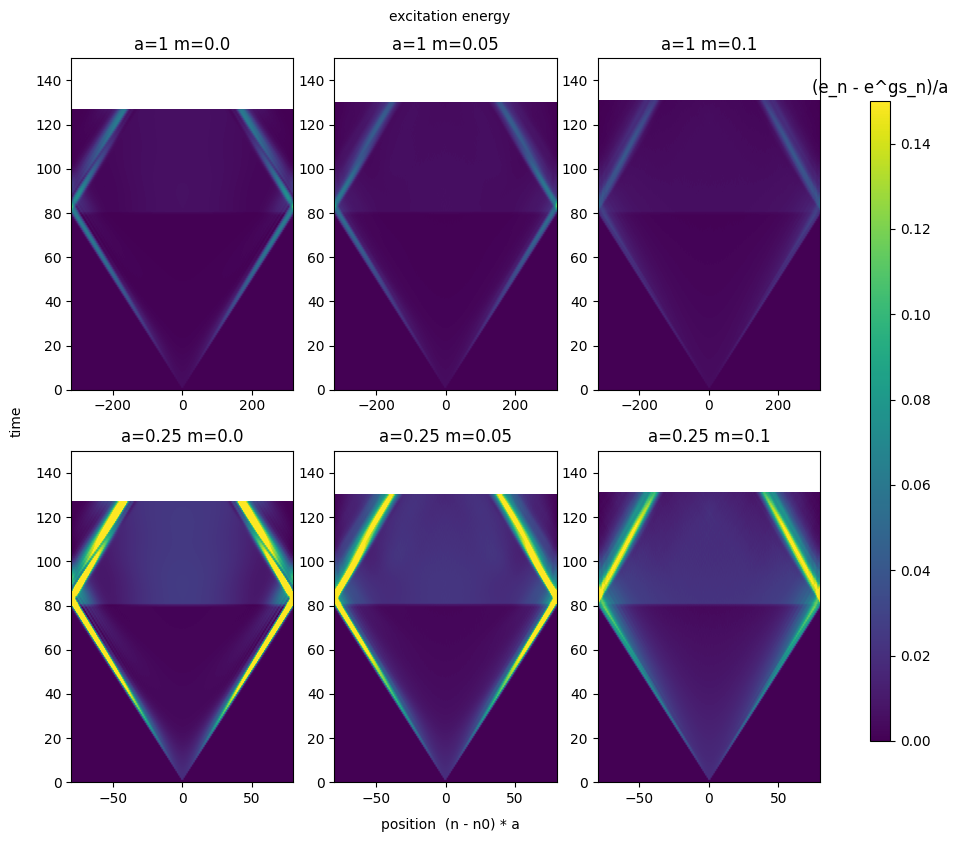

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(10, 8))  # sharex=True, sharey=True,
for i, m in enumerate([0 * g, 0.25 * g, 0.5 * g]):
    for j, a in enumerate([1, 0.25]):

        ee = engs[m, N][:, 1:]
        tm = engs[m, N][:, 0]
        ee = (ee[:, 0::2] + ee[:, 1::2]) /2
        ee = np.insert(ee, 0, 0, 0)
        ee = ee / a

        im = ax[j, i].imshow(ee, extent=(-N*a/2, N*a/2, 0, tm[-1]), origin='lower', aspect='auto', vmin=0, vmax=0.15)
        ax[j, i].set_title(f"{a=} {m=}")
        # ax[j, i].set_xticks([-50, -25, 0, 25, 50])
        ax[j, i].set_ylim([0, 150])
        # ax[j, i].set_xlabel("position")
        # ax[j, i].set_ylabel("time")
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.10, 0.02, 0.8])
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('(e_n - e^gs_n)/a')

fig.text(0.43, -0.01, 'position  (n - n0) * a', ha='center')
fig.text(-0.01, 0.5, 'time', va='center', rotation='vertical')
fig.text(0.43, 1.00, 'excitation energy', ha='center')

In [ ]:
g = 1 / 5
L0 = 0
D0 = 64
t = 20.0
m = 0.0

fname = folder / f"state_D={D0}_{t=:0.2f}.npy"

old_data = np.load(fname, allow_pickle=True).item()
psi_gs = mps.load_from_dict(ops.config, old_data["psi"])